In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from util import *

In [2]:
train = load_data("data/data-202008.csv")

In [3]:
cat_features = ["province_code", "district_code","viettel_bank_code","channel_code"
                ,"staff_code","process_code","shop_code"]

#data = preprocess_data(data, cat_features)

In [4]:
data['request_date_dt'] = pd.to_datetime(data['request_date'], format='%Y-%m-%d %H:%M:%S')
data['date_diff'] = (data['request_date_dt'] - data['request_date_dt'].min()).dt.days
data.head()

,province_code,district_code,status_name,cust_name,msisdn,ben_cust_name,ben_msisdn,request_date,viettel_bank_code,channel_type_id,...,trans_type,process_code,channel_fee,shop_code,transfer_type,customer_fee,fee_partner,is_fraud,request_date_dt,date_diff
0,D501,D501008,NaN,HỒ THỊ KIM TRANG,0001b3807ce1879a06eb,MAI VAN QUY,0001b3807ce1879a06eb,2020-08-17 07:35:35,MB,164.0,...,1,645200,5400.0,1800170007,normal,18000.0,0.0,0,2020-08-17 07:35:35,16
1,T008,T00807,NaN,vu thi thanh giang,0001c4bc0350dc5c8c80,LE TUNG LAM,0001c4bc0350dc5c8c80,2020-08-17 08:59:21,MB,164.0,...,2,400300,5500.0,1800590021,NaN,11000.0,0.0,0,2020-08-17 08:59:21,16
2,D061,D061003,NaN,NGUYỄN VĂN TIỀN,00011341b2c0b40071f7,NGUYỄN VĂN TIỀN,00011341b2c0b40071f7,2020-08-17 05:32:34,VTT,6.0,...,2,400100,1260.0,2200190007,NaN,0.0,0.0,0,2020-08-17 05:32:34,16
3,T008,T00801,NaN,NaN,NaN,NaN,NaN,2020-08-17 03:23:24,KPP,197.0,...,3,PAY_BILL,770.0,6600240001,NaN,0.0,1100.0,0,2020-08-17 03:23:24,16
4,C026,C026001,NaN,NaN,00019784c19ed12c546c,NaN,NaN,2020-08-17 11:02:07,KPP,1.0,...,3,KPP301,700.0,1000113100_VTP,NaN,0.0,1000.0,0,2020-08-17 11:02:07,16


In [7]:
data.shape

(7193506, 25)

In [30]:
data['is_fraud'].value_counts()

0    7166468
1      27038
Name: is_fraud, dtype: int64

<AxesSubplot:ylabel='Frequency'>

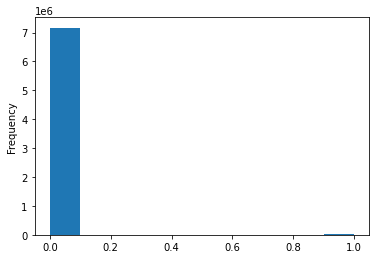

In [31]:
data['is_fraud'].astype(int).plot.hist()

In [32]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [33]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 25 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
status_name,6936465,96.4
transfer_type,5491866,76.3
ben_msisdn,2476050,34.4
cust_name,1808651,25.1
ben_cust_name,1618013,22.5
district_code,227437,3.2
msisdn_channel,220744,3.1
province_code,219578,3.1
msisdn,173270,2.4
channel_type_id,4,0.0


In [34]:
data.dtypes.value_counts()

object            15
float64            6
int64              3
datetime64[ns]     1
dtype: int64

In [35]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

province_code             63
district_code            750
status_name                8
cust_name            1028946
msisdn               1982130
ben_cust_name         930817
ben_msisdn           1735881
request_date         1682807
viettel_bank_code          8
msisdn_channel         77874
channel_code           77022
staff_code             79264
process_code              23
shop_code               4737
transfer_type           4387
dtype: int64

In [6]:
# Number of NaNs for each object
data.isnull().sum(axis=1).head(30)

0     1
1     2
2     2
3     6
4     5
5     3
6     5
7     0
8     2
9     2
10    5
11    5
12    1
13    2
14    2
15    1
16    3
17    1
18    5
19    3
20    5
21    2
22    5
23    5
24    5
25    2
26    2
27    3
28    5
29    2
dtype: int64

In [8]:
# Number of NaNs for each column
data.isnull().sum(axis=0).head(30)

province_code         219578
district_code         227437
status_name          6936465
cust_name            1808651
msisdn                173270
ben_cust_name        1618013
ben_msisdn           2476050
request_date               0
viettel_bank_code          0
channel_type_id            4
msisdn_channel        220744
channel_code               0
staff_code                 0
trans_amount               0
trans_fee                  0
trans_type                 0
process_code               0
channel_fee                4
shop_code                  0
transfer_type        5491866
customer_fee               1
fee_partner                1
is_fraud                   0
request_date_dt            0
date_diff                  0
dtype: int64

In [9]:
#Remove constant features
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = data.nunique(dropna = False)

In [10]:
feats_counts.sort_values()[:10]

is_fraud                2
trans_type              5
viettel_bank_code       8
status_name             9
channel_type_id        20
process_code           23
date_diff              31
province_code          64
district_code         751
transfer_type        4388
dtype: int64

In [ ]:
# constant_features = feats_counts.loc[feats_counts==1].index.tolist()
# print (constant_features)

# data.drop(constant_features,axis = 1,inplace=True)

In [ ]:
# Remove duplicated features
data.fillna('NaN', inplace=True)
train_enc =  pd.DataFrame(index = data.index)

for col in tqdm_notebook(data.columns):
    train_enc[col] = data[col].factorize()[0]
    
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1
dup_cols

In [11]:
# examine the number of unique values.
nunique = data.nunique(dropna=False)
nunique

province_code             64
district_code            751
status_name                9
cust_name            1028947
msisdn               1982131
ben_cust_name         930818
ben_msisdn           1735882
request_date         1682807
viettel_bank_code          8
channel_type_id           20
msisdn_channel         77875
channel_code           77022
staff_code             79264
trans_amount          165198
trans_fee              27397
trans_type                 5
process_code              23
channel_fee            32379
shop_code               4737
transfer_type           4388
customer_fee            4786
fee_partner            26644
is_fraud                   2
request_date_dt      1682807
date_diff                 31
dtype: int64

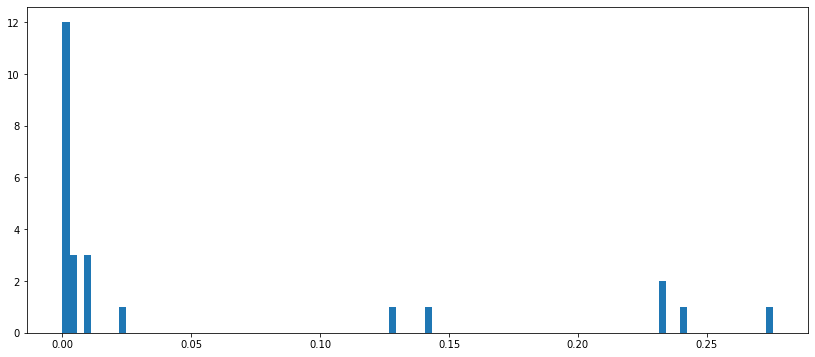

In [12]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/data.shape[0], bins=100)

In [15]:
mask = (nunique.astype(float)/data.shape[0] > 0.25)
data.loc[:, mask]

,msisdn
0,0001b3807ce1879a06eb
1,0001c4bc0350dc5c8c80
2,00011341b2c0b40071f7
3,NaN
4,00019784c19ed12c546c
...,...
7193501,0001a33e7588bccadf86
7193502,00010dc28222475e4ef7
7193503,0001a9faed2682c84da2
7193504,0001bbc3495e5d9a3a0d


In [18]:
mask = (nunique.astype(float)/data.shape[0] < 0.4) & (nunique.astype(float)/data.shape[0] > 0.2)
data.loc[:25, mask]

,msisdn,ben_msisdn,request_date,request_date_dt
0,0001b3807ce1879a06eb,0001b3807ce1879a06eb,2020-08-17 07:35:35,2020-08-17 07:35:35
1,0001c4bc0350dc5c8c80,0001c4bc0350dc5c8c80,2020-08-17 08:59:21,2020-08-17 08:59:21
2,00011341b2c0b40071f7,00011341b2c0b40071f7,2020-08-17 05:32:34,2020-08-17 05:32:34
3,NaN,NaN,2020-08-17 03:23:24,2020-08-17 03:23:24
4,00019784c19ed12c546c,NaN,2020-08-17 11:02:07,2020-08-17 11:02:07
5,00015bc72cd34b25885e,NaN,2020-08-17 03:11:27,2020-08-17 03:11:27
6,000129261910c638222c,NaN,2020-08-17 09:44:40,2020-08-17 09:44:40
7,0001a140c03d4aa1f503,00013cdaba32b44ad763,2020-08-17 09:13:31,2020-08-17 09:13:31
8,0001853acc502e95cc49,00016e71cadd90ed0e02,2020-08-17 13:30:28,2020-08-17 13:30:28
9,0001d8ce8c8cb9cb5133,0001d8ce8c8cb9cb5133,2020-08-17 01:56:15,2020-08-17 01:56:15


In [19]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
num_cols = list(data.select_dtypes(exclude=['object']).columns)

In [20]:
data.replace('NaN', -999, inplace=True)

In [28]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~data[c1].isnull()) & (~data[c2].isnull())
            if i>=j:
                b.append((data.loc[mask,c1].values>=data.loc[mask,c2].values).mean())
            else:
                b.append((data.loc[mask,c1].values>data.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [29]:
# # select first 42 numeric features
# feats = num_cols[:42]

# # build 'mean(feat1 > feat2)' plot
# gt_matrix(feats,16)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [37]:
data.corr()

,channel_type_id,trans_amount,trans_fee,trans_type,channel_fee,customer_fee,fee_partner,is_fraud,date_diff
channel_type_id,1.000000,-0.001171,-0.008402,0.007093,-0.009367,-0.007633,-0.003330,-0.001098,-0.004775
trans_amount,-0.001171,1.000000,0.686843,-0.098218,0.752867,0.515093,0.364255,0.116409,-0.029607
trans_fee,-0.008402,0.686843,1.000000,-0.110654,0.803699,0.830443,0.322737,-0.019613,-0.040289
trans_type,0.007093,-0.098218,-0.110654,1.000000,-0.061092,-0.142249,0.133903,-0.007083,0.032835
channel_fee,-0.009367,0.752867,0.803699,-0.061092,1.000000,0.720564,0.173222,0.012812,-0.052672
customer_fee,-0.007633,0.515093,0.830443,-0.142249,0.720564,1.000000,-0.136791,-0.021432,-0.042986
fee_partner,-0.003330,0.364255,0.322737,0.133903,0.173222,-0.136791,1.000000,-0.014176,-0.036403
is_fraud,-0.001098,0.116409,-0.019613,-0.007083,0.012812,-0.021432,-0.014176,1.000000,-0.001439
date_diff,-0.004775,-0.029607,-0.040289,0.032835,-0.052672,-0.042986,-0.036403,-0.001439,1.000000


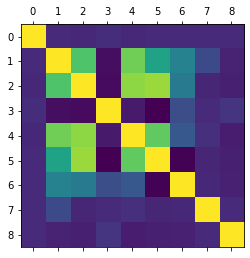

In [36]:
plt.matshow(data.corr())
plt.show()

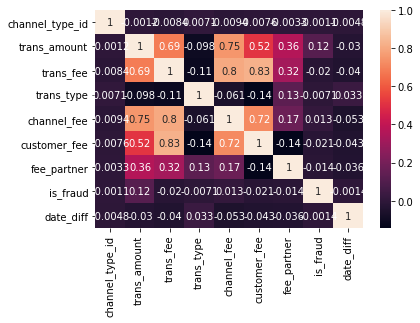

In [42]:
sns.heatmap(data.corr(), annot=True)
plt.show()